In [2]:
import pandas as pd
import re
import os

In [3]:
def read(folder_path):
  log_arrays = {}
  for filename in os.listdir(folder_path):
    if filename.endswith('.log'):
      with open(os.path.join(folder_path, filename), 'r') as f:
        log_array = f.readlines()
        log_name = filename[:-7]
        log_arrays[log_name] = log_array
        print(log_name)
  return log_arrays

In [4]:
folder_path = "../raw_data"
log_arrays = read(folder_path)

Android
Apache
BGL
Hadoop
HDFS
HealthApp
HPC
Linux
Mac
OpenSSH
OpenStack
Proxifier
Spark
Thunderbird
Windows
Zookeeper


In [5]:
def clean_and_normalize_logs(logs):

    cleaned_logs = {}

    for source, log_array in logs.items():
        cleaned_log_array = []
        for log in log_array:
            cleaned_log = re.sub(r'[^\w\s]', '', log)
            cleaned_log = re.sub(r'\s+', ' ', cleaned_log).strip()
            cleaned_log_array.append(cleaned_log)

        cleaned_logs[source] = cleaned_log_array

    return cleaned_logs

logs = log_arrays
cleaned_logs = clean_and_normalize_logs(logs)

In [6]:
cleaned_logs['Apache']

['Sun Dec 04 044744 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 044744 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045108 2005 notice jk2_init Found child 6725 in scoreboard slot 10',
 'Sun Dec 04 045109 2005 notice jk2_init Found child 6726 in scoreboard slot 8',
 'Sun Dec 04 045109 2005 notice jk2_init Found child 6728 in scoreboard slot 6',
 'Sun Dec 04 045114 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 045114 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 045114 2005 notice workerEnvinit ok etchttpdconfworkers2properties',
 'Sun Dec 04 045118 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045118 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045118 2005 error mod_jk child workerEnv in error state 6',
 'Sun Dec 04 045137 2005 notice jk2_init Found child 6736 in scoreboard slot 10',
 'Sun Dec 04 045138 2005 notice jk2_init Found child 6

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
apache_logs = cleaned_logs['Apache']

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
def preprocess_log(log):
    log = re.sub(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', '', log)  # IP addresses
    log = re.sub(r'\[\d{2}/[A-Za-z]+/\d{4}:\d{2}:\d{2}:\d{2}\]', '', log)  # dates
    log = re.sub(r'\"[A-Z]+\s[A-Za-z0-9/.?=&-]*\sHTTP/\d\.\d\"', '', log)  # HTTP requests
    log = re.sub(r'\s\d{3}\s\d+', '', log)  # HTTP status codes and data size
    
    log = log.lower()
    
    # Tokenization and lemmatization
    words = nltk.word_tokenize(log)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]
    print(words)
    
    return ' '.join(words)

In [10]:
preprocessed_logs = [preprocess_log(log) for log in apache_logs]

['sun', 'dec', '04', '044744', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '044744', '2005', 'error', 'child', 'workerenv', 'error', 'state', '6']
['sun', 'dec', '04', '045108', '2005', 'notice', 'found', 'child', '6725', 'scoreboard', 'slot', '10']
['sun', 'dec', '04', '045109', '2005', 'notice', 'found', 'child', '6726', 'scoreboard', 'slot', '8']
['sun', 'dec', '04', '045109', '2005', 'notice', 'found', 'child', '6728', 'scoreboard', 'slot', '6']
['sun', 'dec', '04', '045114', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '045114', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '045114', '2005', 'notice', 'workerenvinit', 'ok', 'etchttpdconfworkers2properties']
['sun', 'dec', '04', '045118', '2005', 'error', 'child', 'workerenv', 'error', 'state', '6']
['sun', 'dec', '04', '045118', '2005', 'error', 'child', 'workerenv', 'error', 'sta

In [11]:
print(preprocessed_logs)

['sun dec 04 044744 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 044744 2005 error child workerenv error state 6', 'sun dec 04 045108 2005 notice found child 6725 scoreboard slot 10', 'sun dec 04 045109 2005 notice found child 6726 scoreboard slot 8', 'sun dec 04 045109 2005 notice found child 6728 scoreboard slot 6', 'sun dec 04 045114 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 045114 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 045114 2005 notice workerenvinit ok etchttpdconfworkers2properties', 'sun dec 04 045118 2005 error child workerenv error state 6', 'sun dec 04 045118 2005 error child workerenv error state 6', 'sun dec 04 045118 2005 error child workerenv error state 6', 'sun dec 04 045137 2005 notice found child 6736 scoreboard slot 10', 'sun dec 04 045138 2005 notice found child 6733 scoreboard slot 7', 'sun dec 04 045138 2005 notice found child 6734 scoreboard slot 9', 'sun dec 04 04515

In [12]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

log_embeddings = model.encode(preprocessed_logs)

print(log_embeddings)

[[-0.42281532 -0.14745182  0.00842984 ... -0.307701    0.09045246
   0.3951754 ]
 [-0.28452277  0.0701229  -0.18697008 ... -0.05619369  0.23543161
   0.15820742]
 [-0.10224348  0.28046393 -0.23054881 ...  0.14265876 -0.2096248
   0.23463792]
 ...
 [-0.07467953  0.27291366 -0.30917662 ...  0.19559038 -0.16422108
   0.19411552]
 [-0.398622    0.05272147  0.00859191 ... -0.4084409   0.18302046
   0.45896322]
 [-0.30108908  0.12705532 -0.089823   ... -0.01353956  0.36152673
   0.22993287]]


In [13]:
from sentence_transformers import util
    
similarities = util.pytorch_cos_sim(log_embeddings, log_embeddings)

import pandas as pd

similarity_df = pd.DataFrame(similarities, index=apache_logs, columns=apache_logs)
print(similarity_df)

                                                    Sun Dec 04 044744 2005 notice workerEnvinit ok etchttpdconfworkers2properties  \
Sun Dec 04 044744 2005 notice workerEnvinit ok ...                                           1.000000                               
Sun Dec 04 044744 2005 error mod_jk child worke...                                           0.640211                               
Sun Dec 04 045108 2005 notice jk2_init Found ch...                                           0.284006                               
Sun Dec 04 045109 2005 notice jk2_init Found ch...                                           0.314093                               
Sun Dec 04 045109 2005 notice jk2_init Found ch...                                           0.308912                               
...                                                                                               ...                               
Mon Dec 05 191411 2005 error mod_jk child worke...                   

In [14]:
# Example new log
new_log = "127.0.0.1 - - [28/Aug/2024:12:36:10] \"GET /home.html HTTP/1.1\" 200 2048"

# Preprocess the new log
preprocessed_new_log = preprocess_log(new_log)

# Convert the new log to an embedding
new_log_embedding = model.encode(preprocessed_new_log)

# Calculate similarity with existing logs
similarities_with_new_log = util.pytorch_cos_sim(new_log_embedding, log_embeddings)

# Find the most similar log
most_similar_index = similarities_with_new_log.argmax()
most_similar_log = apache_logs[most_similar_index]
similarity_score = similarities_with_new_log[0][most_similar_index].item()

print(f"Most similar log: {most_similar_log}")
print(f"Similarity score: {similarity_score}")


[]
Most similar log: Mon Dec 05 033651 2005 notice jk2_init Found child 2811 in scoreboard slot 9
Similarity score: 0.1407538652420044


In [15]:
# Example mapping of log types to severity
severity_mapping = {
    "error": 5,
    "warning": 3,
    "info": 1,
    # Extend as necessary
}

# Example of determining severity based on log content
def determine_severity(log):
    if "error" in log:
        return severity_mapping["error"]
    elif "warning" in log:
        return severity_mapping["warning"]
    else:
        return severity_mapping["info"]

# Assign severity to the most similar log
assigned_severity = determine_severity(most_similar_log)
print(f"Assigned Severity: {assigned_severity}")


Assigned Severity: 1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


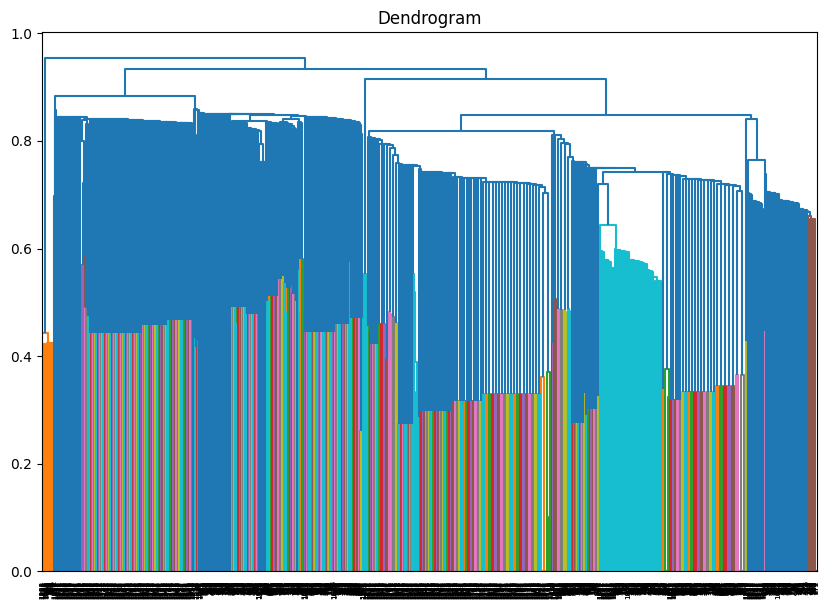

Cluster Labels: [0 0 2 ... 2 0 0]


In [20]:
# Clustering Approach

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Ensure you have the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample logs
apache_logs = cleaned_logs['Apache']

# Step 1: Preprocessing
def preprocess_log(log):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    log = log.lower()
    words = word_tokenize(log)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]
    
    return ' '.join(words)

preprocessed_logs = [preprocess_log(log) for log in apache_logs]

# Step 2: Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_logs)

# Step 3: Calculate similarity and perform clustering
similarity_matrix = cosine_similarity(X)
clustering_model = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cosine')
labels = clustering_model.fit_predict(X.toarray())

# Step 4: Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X.toarray(), method='average', metric='cosine'))
plt.show()

# Output the clusters
print("Cluster Labels:", labels)


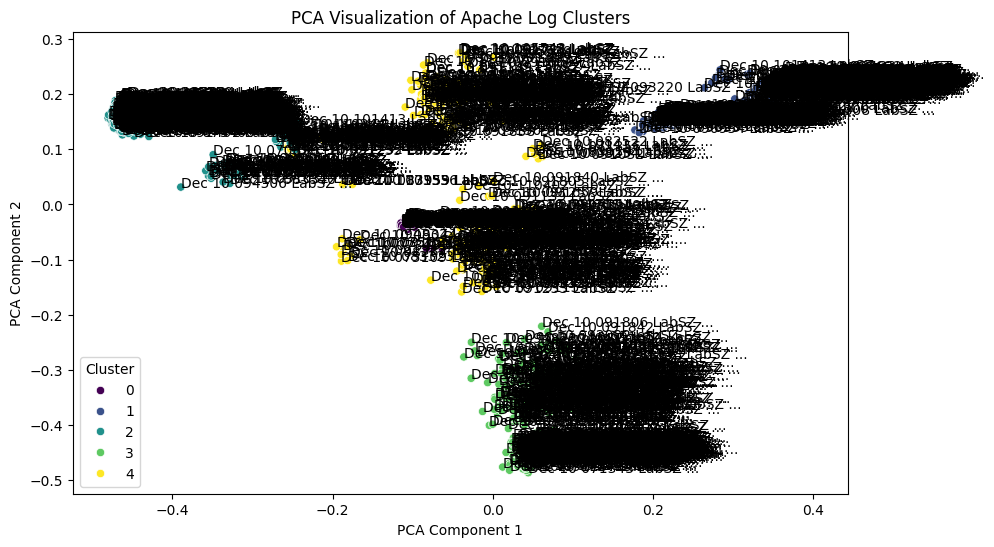


Cluster 0:
  - Dec 10 065546 LabSZ sshd24200 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 070828 LabSZ sshd24208 reverse mapping checking getaddrinfo for nsmarryaldkfaczczcom 17323431186 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 074800 LabSZ sshd24321 reverse mapping checking getaddrinfo for 191210223172uservivozapcombr 191210223172 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 075112 LabSZ sshd24324 reverse mapping checking getaddrinfo for 19515437122revponeytelecomeu 19515437122 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 075117 LabSZ sshd24326 reverse mapping checking getaddrinfo for 19515437122revponeytelecomeu 19515437122 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 091246 LabSZ sshd24503 reverse mapping checking getaddrinfo for customer187141143180stauninetidecommx 187141143180 failed POSSIBLE BREAKIN ATTEMPT
  - Dec 10 091251 LabSZ sshd24505 reverse mapping checking getaddrinfo for customer187141143180staunineti

In [23]:
# Sentence BERT Approach

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

# Step 1: Sample Apache Logs
apache_logs = cleaned_logs['OpenSSH']

# Step 2: Load Sentence-BERT model and generate embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # Using a smaller, faster model
embeddings = model.encode(apache_logs)

# Step 3: Perform K-Means Clustering
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Step 4: Visualize the Clusters using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=labels, palette='viridis')
for i, txt in enumerate(apache_logs):
    plt.annotate(txt[:20] + "...", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('PCA Visualization of Apache Log Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 5: Display Clustering Results
clustered_logs = {i: [] for i in range(n_clusters)}
for log, label in zip(apache_logs, labels):
    clustered_logs[label].append(log)

for cluster, logs in clustered_logs.items():
    print(f"\nCluster {cluster}:")
    for log in logs:
        print(f"  - {log}")
